In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 
import re
import random

from sklearn.preprocessing import OneHotEncoder

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [2]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1-1. 항목별 생존 비율 시각화를 통한 데이터 둘러보기

### A. Age - Survived

In [3]:
data_df['Age'].max()

80.0

Text(0.5, 1.0, 'Age Frequency')

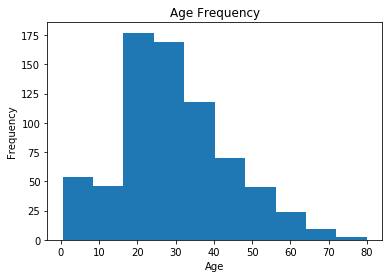

In [4]:
# age_hist = data_df['Age'].plot(kind='hist', figsize=(6,6))
age_hist = plt.hist(data_df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency')

In [5]:
# Age 를 20세별로 묶어서 dataframe 에 새로 추가하기

# 방법 1 - 반복문 돌려 새 열에 값 할당하기

data_df['Age_range_20'] = ''

for idx, age in enumerate(data_df['Age']):
    if age >= 60:
        data_df.at[idx, 'Age_range_20'] = '60+'
    elif age >= 40:
        data_df.at[idx, 'Age_range_20'] = '4050'
    elif age >= 20:
        data_df.at[idx, 'Age_range_20'] = '2030'    
    elif age >= 0:
        data_df.at[idx, 'Age_range_20'] = '0010'
    else:
        data_df.at[idx, 'Age_range_20'] = 'Null'

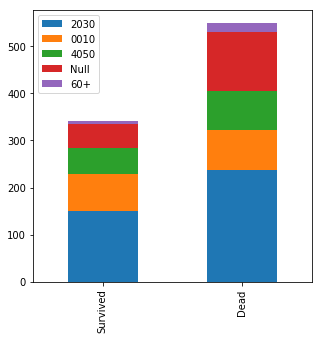

In [7]:
# 연령 20세 단위 구간별 생존자, 사망자 수 구하기

def survived_graph(value):
    survived = data_df[data_df['Survived']==1][value].value_counts()
    dead = data_df[data_df['Survived']==0][value].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(5,5))
    
survived_graph('Age_range_20')

In [7]:
# 방법 2 - .cut() 함수 사용해서 10세별로 묶기

bins = list(range(0, 100, 10))
age_groups = [str(x) + ' to ' + str(x+9) for x in bins]

data_df['Age_range_10'] = pd.cut(data_df['Age'], bins, right=False, labels = age_groups[:-1], include_lowest = True)

# 60 세 이상 연령 묶기

data_df.replace(to_replace = age_groups[6:], value = 'over 60', inplace=True)
data_df [(data_df['Age_range_10'] == 'over 60') ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range_20,Age_range_10
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,60+,over 60
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,60+,over 60
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,60+,over 60
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,60+,over 60
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,60+,over 60
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,60+,over 60
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,60+,over 60
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,60+,over 60
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,60+,over 60
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,60+,over 60


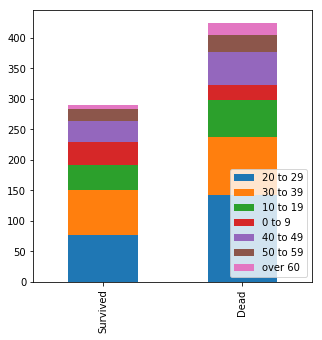

In [8]:
# 연령 10세 단위 구간별 생존자, 사망자 수 구하기

survived_graph('Age_range_10')

In [9]:
# 연령별 생존율 구하기

grouped = data_df.groupby(data_df['Age_range_10'])
surv_rate_age = grouped.sum().Survived / grouped.size()
surv_df = pd.DataFrame(surv_rate_age, columns=['survivalrate'])
surv_df

,survivalrate
Age_range_10,
0 to 9,0.612903
10 to 19,0.401961
20 to 29,0.350000
30 to 39,0.437126
40 to 49,0.382022
50 to 59,0.416667
over 60,0.269231


### B. Name(Title) - Survived

In [10]:
# Name 에서 Title 꺼낸 열 만들기

data_df['title'] = ''

for idx, x in enumerate(data_df['Name']):
    exp = re.compile(r'[A-Za-z]+\.')
    exp_result = exp.search(x)
    data_df.at[idx, 'title'] = exp_result.group().replace('.', '')
       
dict_names = Counter(data_df['title'])
dict_names

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [11]:
# 소수의 title 'other' 로 묶기

title_list = ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev']

for idx, x in enumerate(data_df['title']):
    if x not in title_list:
        data_df.at[idx, 'title'] = 'other'

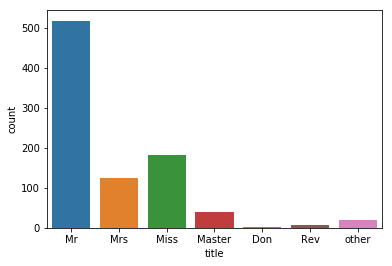

In [12]:
# Title 별 개수 시각화

title_df = pd.DataFrame(data_df['title'])
sns.countplot(x='title', data=title_df)
plt.show()

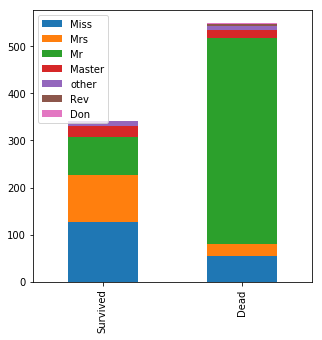

In [13]:
# 앞서 만든 함수 불러와서 시각화
    
survived_graph('title')

### C. Embarked - Survived

In [14]:
count=data_df.Survived[data_df.Embarked=='S'].value_counts()
count

0    427
1    217
Name: Survived, dtype: int64

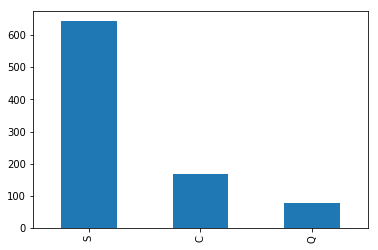

In [15]:
# 각 탑승객 수 시각화

data_df.Embarked.value_counts().plot(kind="bar")

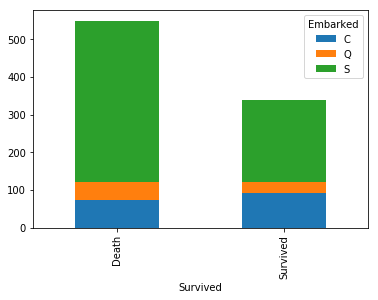

In [16]:
# plot(Survived -- Embarked)

data_df.Survived = data_df.Survived.replace([0,1],['Death','Survived'])
pd.crosstab(data_df.Survived, data_df.Embarked).plot.bar(stacked=True)

In [17]:
data_df.Survived = data_df.Survived.replace(['Death','Survived'],[0,1])
ct = pd.crosstab(data_df.Survived, data_df.Embarked)
ct

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [18]:
# get surv_rate, dead_rate

def rating(df):
    
    col_n = len(df.columns) #3 -> 0,1,2
    dead_dic ={}
    surv_dic ={}
    
    for i in range(col_n):
        surv_rate = df[df.columns[i]][1]/sum(df[df.columns[i]])
        dead_rate = df[df.columns[i]][0]/sum(df[df.columns[i]])
        surv_dic[df.columns[i]]= round(surv_rate,4)
        dead_dic[df.columns[i]]= round(dead_rate,4)
    
    row_s = pd.Series(data=surv_dic, name='surv_rate')
    row_d = pd.Series(data=dead_dic, name='dead_rate')
    
    
    #append row to the dataframe
    df= df.append(row_s, ignore_index=False)
    df= df.append(row_d, ignore_index=False)   
    
    return df

In [19]:
ct = rating(ct)
ct

Embarked,C,Q,S
Survived,,,
0,75.0000,47.0000,427.000
1,93.0000,30.0000,217.000
surv_rate,0.5536,0.3896,0.337
dead_rate,0.4464,0.6104,0.663


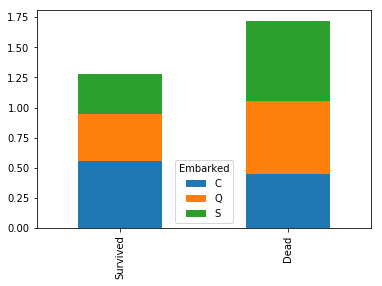

In [20]:
data = ct.iloc[2:] #only for surv_rate, dead_rate
data.index = ['Survived', 'Dead']
data.plot.bar(stacked=True)

### D. Cabin - Survived

In [21]:
#Cabin이 널값이 아닌 데이터를 복사해놓음

Not_NanCabin = data_df[data_df["Cabin"].notnull()]

In [22]:
#Cabin열의 값을 알파벳으로 자르는 함수선언

def cabin_str(df):
    col_list = []
    for row in df.index:
        cabin_str = str(df["Cabin"][row]).upper()
        col_list.append(cabin_str[0])
    
    return col_list

In [23]:
#함수를 사용하여 잘라준 알파벳리스트를 Cabin열에 다시 넣어줌

data_df["Cabin"] = cabin_str(data_df)

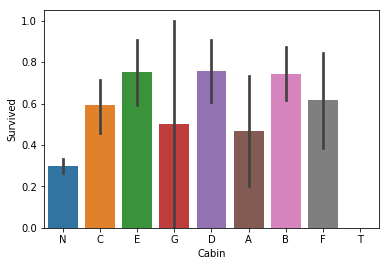

In [24]:
# 선실유형별 생존율

sns.barplot(x='Cabin', y='Survived', data=data_df)

# "C, E, D, B, F"로 시작하는 선실타입은 생존율이 높은반면
# "G, A"는 생존율이 비교적 낮고
# "N"은 매우 낮음
# : 사망자와 생존자 중 선실유형 분포율 보기.

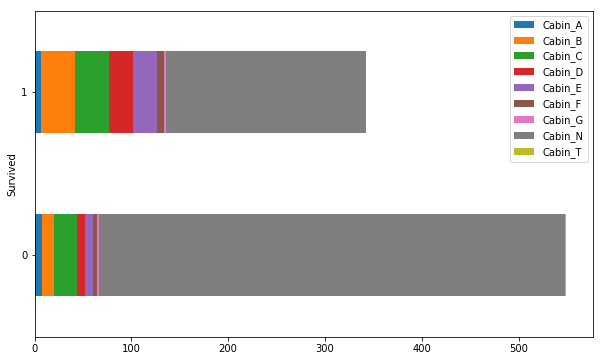

In [25]:
# 생존/사망별 선실유형 분포율

temp_df = data_df[["Survived", "Cabin"]]
Survived_Cabin = pd.get_dummies(temp_df, columns = ["Cabin"])
Survived_Cabin_bar = pd.pivot_table(Survived_Cabin, index="Survived", aggfunc=np.sum)
Survived_Cabin_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

# : 선실타입이 NaN값이 많아 압도적으로 많이 나온다.

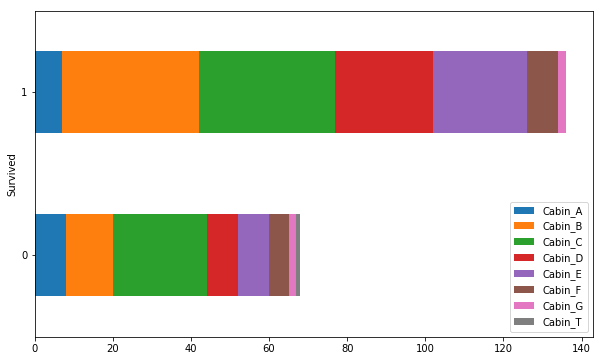

In [26]:
# 생존/사망별 선실유형(Not NaN) 분포율

Not_NanCabin["Cabin"] = cabin_str(Not_NanCabin)
temp_df2 = Not_NanCabin[["Survived", "Cabin"]]
N_n_Survived_Cabin = pd.get_dummies(temp_df2, columns = ["Cabin"])
N_n_Survived_Cabin_bar = pd.pivot_table(N_n_Survived_Cabin, index="Survived", aggfunc=np.sum)
N_n_Survived_Cabin_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

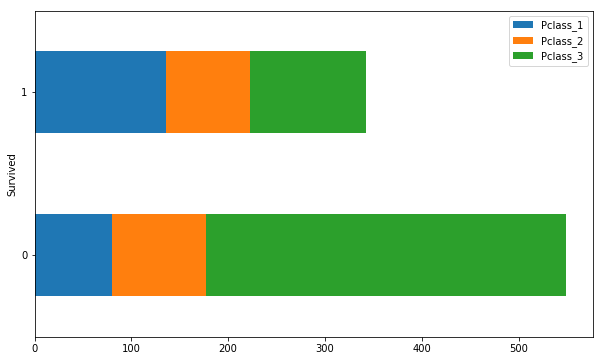

In [27]:
# 선실유형 NaN값의 생존/사망별 Pclass분포도

temp_CabinN = data_df[["Survived", "Pclass"]]
Cabin_null = pd.get_dummies(temp_CabinN, columns = ["Pclass"])
Cabin_n_bar = pd.pivot_table(Cabin_null, index="Survived", aggfunc=np.sum)
Cabin_n_bar.plot(kind="barh", stacked=True, width=0.5, figsize=(10,6))

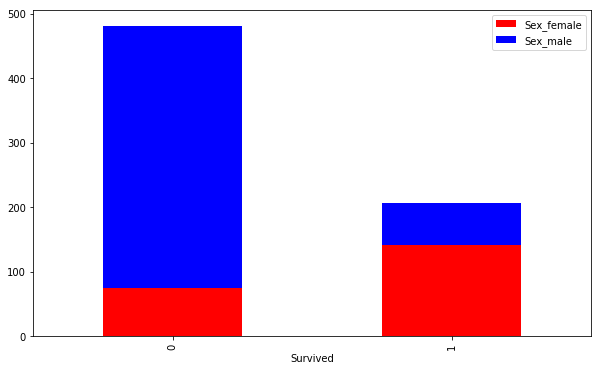

In [28]:
# 선실유형 NaN값의 생존/사망별 성별의 분포

temp_CabinN = data_df[["Survived", "Sex"]][data_df["Cabin"] == "N"]
Cabin_null = pd.get_dummies(temp_CabinN, columns = ["Sex"])
Cabin_n_bar = pd.pivot_table(Cabin_null, index="Survived", aggfunc=np.sum)
Cabin_n_bar.plot(kind="bar", stacked=True, width=0.5, figsize=(10,6),color=['r', 'b'])

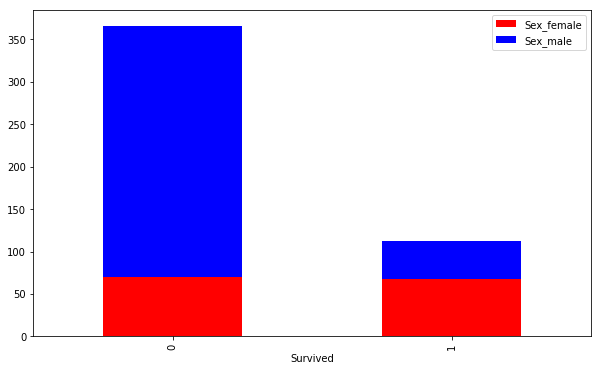

In [29]:
# (선실유형 NaN값 & Pclass: 3)의 생존/사망별 성별의 분포

temp_CabinN = data_df[["Survived","Sex","Pclass"]][data_df["Cabin"] == "N"]
temp_Class3 = temp_CabinN[["Survived","Sex","Pclass"]][temp_CabinN["Pclass"] == 3]
temp_Cabin_N3 = temp_Class3[["Survived", "Sex"]]
Cabin_n_3 = pd.get_dummies(temp_Cabin_N3, columns = ["Sex"])
Cabin_n_3_bar = pd.pivot_table(Cabin_n_3, index="Survived", aggfunc=np.sum)
Cabin_n_3_bar.plot(kind="bar", stacked=True, width=0.5, figsize=(10,6),color=['r', 'b'])

### E. Pclass - Survived

In [30]:
# Survived와 Pclass의 상관관계확인을 위해 두개의 열만 선택
new_df = data_df[['Survived', 'Pclass']]
new_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [31]:
# Pclass열만 one-hot 인코딩

new_enc_df=pd.get_dummies(new_df, columns = ['Pclass'])
new_enc_df.head()

,Survived,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1
1,1,1,0,0
2,1,0,0,1
3,1,1,0,0
4,0,0,0,1


In [32]:
#인덱스 설정

newind_df = pd.pivot_table(new_enc_df, index='Survived', aggfunc=np.sum)
newind_df

,Pclass_1,Pclass_2,Pclass_3
Survived,,,
0,80,97,372.0
1,136,87,119.0


In [33]:
newindx_df=newind_df.rename(index = {0:'Dead', 1: 'Survived'})
newindx_df

,Pclass_1,Pclass_2,Pclass_3
Survived,,,
Dead,80,97,372.0
Survived,136,87,119.0


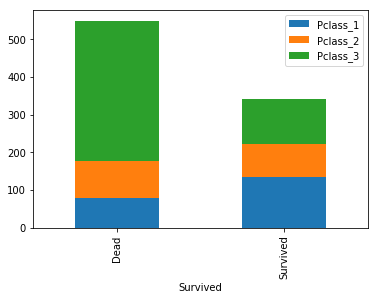

In [34]:
# 생존자와 Pclass의 수 시각화
newindx_df.plot.bar(stacked= True)

### F. Fare - Survived

In [35]:
data_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
# Fare 열 범주화 (항목별로 5단위씩)

anayl_data = data_df[['Survived', 'Fare']]
anayl_data.head()

bins = [0,5,10,15,20,25,30,35,50,100, 200, 300] 
bins_names = ["1st","2nd",'3rd',"4th",'5th',"6th",'7th',"8th",'9th', '10th', '11th']

# .cut() 함수 사용
Fare_categories = pd.cut(anayl_data['Fare'], bins, labels = bins_names)
data_df['Fare_D'] = Fare_categories

# anayl_data = anayl_data.groupby(anayl_data['Fare_D']).sum()
# anayl_data

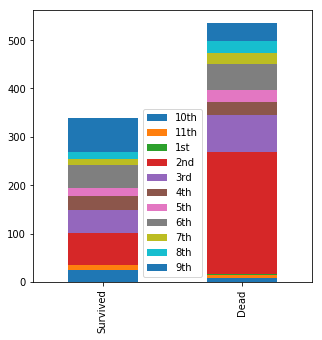

In [37]:
# Fare 별 생존 개수 시각화

survived_graph('Fare_D')


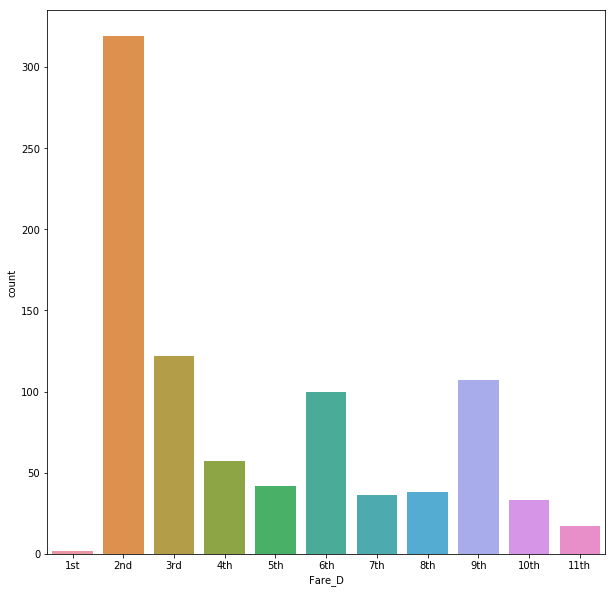

In [38]:
# Fare 범주별 Survived 시각화

plt.figure(figsize=(10,10))
sns.countplot(x='Fare_D', data=data_df)
plt.show()

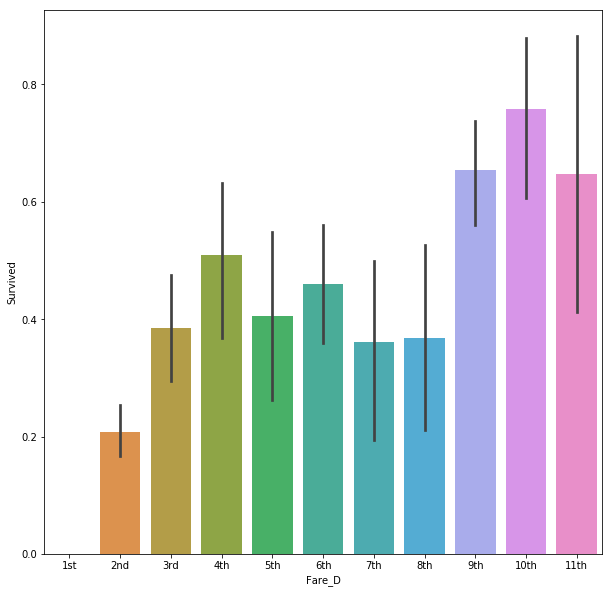

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Fare_D', y = 'Survived', data = data_df)
plt.show()

In [40]:
# # 수정 필요 (??)

# sample_df = pd.concat([x_data_new, y_data], axis = 1)   
# sample_df.corr()

# plt.figure(figsize=(10,10))
# sns.heatmap(data = anayl_data.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')


<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

## 2-1. y data, x data 만들기

In [41]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [42]:
del data_df['Survived']
x_data = data_df.copy()

In [43]:
x_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range_20,Age_range_10,title,Fare_D
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2030,20 to 29,Mr,2nd
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2030,30 to 39,Mrs,9th
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,2030,20 to 29,Miss,2nd


## 2-2. 불필요한 열 삭제, 필요한 열 추가

In [44]:
x_data.drop(['Age_range_20', 'Age_range_10', 'Name', 'PassengerId', 'Ticket'], inplace=True, axis=1)

In [45]:
x_data['Family'] = x_data['SibSp'] + x_data['Parch']
x_data.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

## 2-3. 결측치 채우기

In [46]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    889 non-null object
title       891 non-null object
Fare_D      873 non-null category
Family      891 non-null int64
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 57.0+ KB


### A. Age 결측치

In [47]:
# 기존 데이터의 Age 를 하나의 pool 로 만들어 랜덤 추출후 값 지정

age_list = [ x for x in x_data['Age'].dropna()] 

for idx, x in enumerate(x_data['Age'].isnull()):
    new_x = random.choice(age_list)
    if x == True:
        x_data.at[idx, 'Age'] = new_x

### B. Cabin 결측치

### C. Embarked 결측치

In [48]:
# replace null values(2) --> 'S'

x_data[x_data.Embarked.isnull()] #index 61/829

x_data.Embarked[x_data.index==61]='S'
x_data.Embarked[x_data.index==829]='S'

x_data[x_data.Embarked.isnull()]

,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Fare_D,Family


### D. Fare 결측치

## 2-4. 엔코딩

In [53]:
# Embarked one-hot encoding (C = Cherbourg, Q = Queenstown, S = Southampton)

temp = pd.get_dummies(x_data['Embarked'], drop_first=False, dummy_na=True, prefix = 'embarked')
x_data = pd.concat([x_data,temp],axis=1)
del x_data['Embarked']

# Sex one-hot encoding 

temp = pd.get_dummies(x_data['Sex'], drop_first=False, prefix = 'Sex') 
x_data = pd.concat([x_data,temp],axis=1)
del x_data['Sex']

# Title one-hot encoding 
temp = pd.get_dummies(x_data['title'], drop_first=False, prefix = 'title') 
x_data = pd.concat([x_data,temp],axis=1)
del x_data['title']

In [54]:
x_data.head()

,Pclass,Age,Fare,Cabin,Fare_D,Family,embarked_C,embarked_Q,embarked_S,embarked_nan,Sex_female,Sex_male,title_Don,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_other
0,3,22.0,7.2500,N,2nd,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,1,38.0,71.2833,C,9th,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,3,26.0,7.9250,N,2nd,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,1,35.0,53.1000,C,9th,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,3,35.0,8.0500,N,2nd,0,0,0,1,0,0,1,0,0,0,1,0,0,0


<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

<br>

## 4. Train the model

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)